In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using CSV, DelimitedFiles, DataFrames, JLD

## Combinatorial Laplacian with random graphs

ER graph

least eigenvalue: (ComplexF64[0.07315090221219442 + 0.06818317611802757im, 0.07315090221219445 + 0.06818317611802754im, 0.07315090221219445 + 0.06818317611802752im, 0.07315090221219446 + 0.06818317611802745im, 0.07315090221219446 + 0.06818317611802749im, 0.07315090221219449 + 0.06818317611802749im, 0.07315090221219446 + 0.06818317611802753im, 0.07315090221219452 + 0.06818317611802747im, 0.07315090221219447 + 0.06818317611802754im, 0.07315090221219447 + 0.06818317611802749im, 0.07315090221219449 + 0.06818317611802747im, 0.07315090221219445 + 0.06818317611802747im, 0.07315090221219447 + 0.06818317611802752im, 0.07315090221219442 + 0.06818317611802752im, 0.07315090221219446 + 0.06818317611802746im, 0.07315090221219449 + 0.06818317611802752im, 0.07315090221219446 + 0.06818317611802752im, 0.07315090221219452 + 0.06818317611802749im, 0.07315090221219447 + 0.06818317611802752im, 0.0731509022121945 + 0.0681831761180275im, 0.07315090221219445 + 0.06818317611802752im, 0.07315090221219446 + 0.068

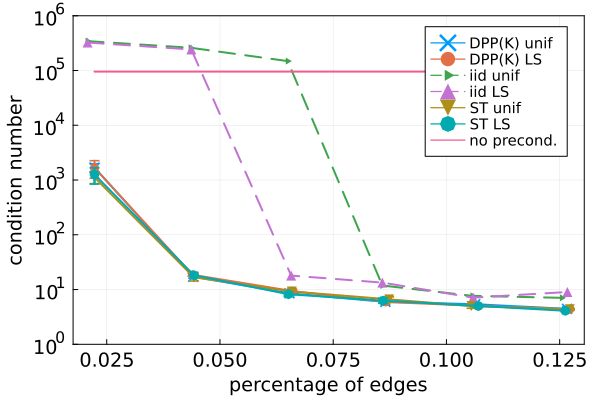

In [12]:
rng = Random.default_rng()

# connection graph parameters
n = 100
p = 0.9
eta = 0.

# regularization parameter
q = 0.001

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 3 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# simple ER graph
meta_g = gen_graph_mun(rng, n, p, eta)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

# print least eigenvalues
B = sp_magnetic_incidence(meta_g)
l = power_method_least_eigenvalue(B' * B)
println("least eigenvalue: ", l)

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng)
name = "precond"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e6)
plot_comparison_cond(D_results,y_limits;legendposition=:topright)

# saving plot
savefig("figures/"*name*".pdf")


In [ ]:
method = "DPP(K) unif"
plot_nb_roots(D_results, method; legendposition=:topleft)

# saving
foldername = "figures/"*name*"_nb_roots"*".pdf"
savefig(foldername)

 SBM graph

least eigenvalue: (ComplexF64[0.025318116212094198 + 0.02467778335813343im, 0.0253181162120942 + 0.024677783358133434im, 0.025318116212094212 + 0.024677783358133438im, 0.02531811621209421 + 0.024677783358133438im, 0.025318116212094198 + 0.024677783358133427im, 0.025318116212094198 + 0.02467778335813341im, 0.02531811621209421 + 0.02467778335813343im, 0.025318116212094226 + 0.024677783358133424im, 0.0253181162120942 + 0.024677783358133424im, 0.02531811621209422 + 0.024677783358133407im, 0.02531811621209422 + 0.024677783358133455im, 0.02531811621209419 + 0.02467778335813342im, 0.02531811621209418 + 0.024677783358133438im, 0.02531811621209419 + 0.024677783358133434im, 0.025318116212094212 + 0.024677783358133445im, 0.0253181162120942 + 0.024677783358133438im, 0.025318116212094212 + 0.024677783358133424im, 0.02531811621209419 + 0.024677783358133417im, 0.025318116212094198 + 0.024677783358133424im, 0.02531811621209419 + 0.024677783358133434im, 0.025318116212094226 + 0.024677783358133438im, 0.

0.024677783358133434im, 0.0253181162120942 + 0.024677783358133424im, 0.02531811621209419 + 0.02467778335813344im, 0.0253181162120942 + 0.024677783358133427im, 0.02531811621209419 + 0.02467778335813342im, 0.02531811621209421 + 0.024677783358133438im, 0.025318116212094184 + 0.02467778335813341im, 0.0253181162120942 + 0.02467778335813342im, 0.02531811621209419 + 0.024677783358133414im, 0.025318116212094184 + 0.024677783358133424im, 0.0253181162120942 + 0.02467778335813344im, 0.025318116212094146 + 0.02467778335813341im, 0.025318116212094198 + 0.024677783358133462im, 0.025318116212094198 + 0.024677783358133445im, 0.025318116212094198 + 0.024677783358133427im, 0.025318116212094198 + 0.024677783358133424im, 0.0253181162120942 + 0.024677783358133427im, 0.02531811621209418 + 0.024677783358133407im, 0.02531811621209421 + 0.024677783358133427im, 0.025318116212094184 + 0.0246777833581334im, 0.025318116212094184 + 0.024677783358133417im, 0.025318116212094184 + 0.024677783358133417im, 0.02531811621

0.024677783358131453im, 0.025318116212092182 + 0.024677783358131464im, 0.025318116212092186 + 0.024677783358131453im, 0.025318116212092148 + 0.02467778335813145im, 0.025318116212092154 + 0.024677783358131443im, 0.02531811621209217 + 0.024677783358131457im, 0.025318116212092175 + 0.024677783358131467im, 0.02531811621209217 + 0.02467778335813145im, 0.025318116212092165 + 0.02467778335813145im, 0.02531811621209217 + 0.024677783358131474im, 0.025318116212092193 + 0.02467778335813147im, 0.025318116212092165 + 0.02467778335813145im, 0.025318116212092158 + 0.024677783358131457im, 0.025318116212092165 + 0.024677783358131453im, 0.025318116212092158 + 0.024677783358131436im, 0.025318116212092165 + 0.02467778335813145im, 0.025318116212092165 + 0.024677783358131457im, 0.02531811621209217 + 0.024677783358131464im, 0.025318116212092154 + 0.02467778335813145im, 0.025318116212092165 + 0.02467778335813146im, 0.025318116212092165 + 0.024677783358131453im, 0.025318116212092158 + 0.02467778335813145im, 0.

0.024677783358131457im, 0.025318116212092165 + 0.024677783358131446im, 0.025318116212092175 + 0.024677783358131464im, 0.025318116212092165 + 0.02467778335813145im, 0.025318116212092154 + 0.024677783358131443im, 0.025318116212092165 + 0.02467778335813145im, 0.025318116212092175 + 0.024677783358131464im, 0.025318116212092154 + 0.024677783358131436im, 0.025318116212092165 + 0.02467778335813145im, 0.02531811621209217 + 0.024677783358131443im, 0.025318116212092165 + 0.024677783358131446im, 0.02531811621209217 + 0.024677783358131464im, 0.025318116212092182 + 0.024677783358131467im, 0.025318116212092182 + 0.024677783358131464im, 0.025318116212092175 + 0.02467778335813146im, 0.025318116212092182 + 0.024677783358131467im, 0.02531811621209217 + 0.02467778335813146im, 0.025318116212092148 + 0.024677783358131453im, 0.025318116212092158 + 0.024677783358131457im, 0.025318116212092148 + 0.024677783358131443im, 0.02531811621209217 + 0.024677783358131453im, 0.025318116212092175 + 0.024677783358131464im

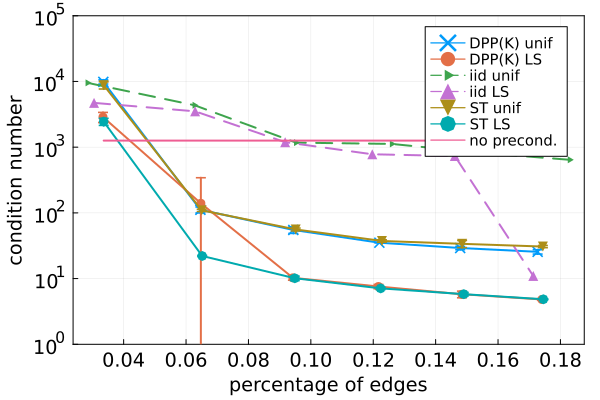

0.024677783358131464im, 0.025318116212092165 + 0.024677783358131457im, 0.025318116212092165 + 0.024677783358131453im, 0.025318116212092165 + 0.02467778335813145im, 0.025318116212092154 + 0.024677783358131446im, 0.025318116212092154 + 0.024677783358131443im, 0.02531811621209217 + 0.024677783358131464im, 0.025318116212092158 + 0.02467778335813145im, 0.025318116212092182 + 0.024677783358131464im, 0.025318116212092137 + 0.024677783358131426im, 0.02531811621209214 + 0.024677783358131436im, 0.02531811621209217 + 0.024677783358131464im, 0.025318116212092158 + 0.024677783358131446im, 0.02531811621209217 + 0.024677783358131457im, 0.02531811621209217 + 0.02467778335813145im, 0.02531811621209217 + 0.02467778335813145im, 0.025318116212092165 + 0.024677783358131453im, 0.025318116212092175 + 0.02467778335813146im, 0.025318116212092165 + 0.024677783358131443im, 0.025318116212092165 + 0.024677783358131457im, 0.025318116212092154 + 0.02467778335813144im, 0.025318116212092165 + 0.024677783358131453im, 0

In [13]:
rng = Random.default_rng()

# graph parameters
c = [100 0.01 ;
0.01 20]
n = [400 ; 400]

# regularization parameter
q = 0.1

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 3 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# simple SBM graph
g =  stochastic_block_model(c, n)
meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

# print least eigenvalues
B = sp_magnetic_incidence(meta_g)
l = power_method_least_eigenvalue(B' * B)
println("least eigenvalue: ", l)

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng)
name = "precond"*"SBM"*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e5)
plot_comparison_cond(D_results,y_limits;legendposition=:topright)

# saving plot
savefig("figures/"*name*".pdf")


In [ ]:
method = "DPP(K) unif"
plot_nb_roots(D_results, method; legendposition=:topleft)

# saving
foldername = "figures/"*name*"_nb_roots"*".pdf"
savefig(foldername)

## Magnetic Laplacian with random graphs

MUN graph model

least eigenvalue: (

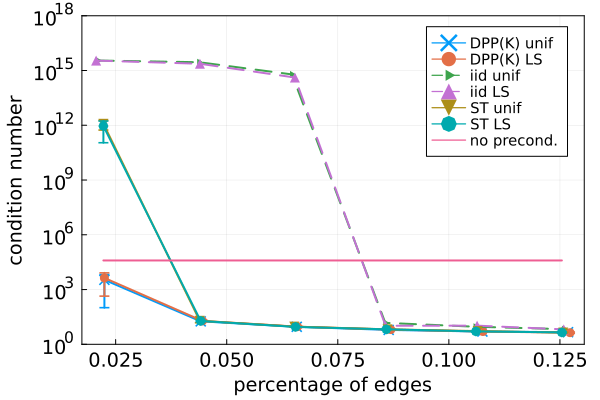

ComplexF64[0.07081029194939277 - 0.07060551321564262im, -0.021439291135756402 + 0.09767371713929993im, 0.01636891219569254 + 0.09865118937210633im, 0.06474710980884205 + 0.07621100704341027im, 0.022643481947379217 + 0.09740354039707665im, 0.03478554655828252 + 0.09375549707839997im, 0.028741646231705015 + 0.09578155679702738im, 0.09972318882137515 + 0.007443611633370219im, 0.0883972176889918 + 0.04675662988732838im, 0.07307399603512564 - 0.06826323785543936im, 0.09839438420432442 - 0.017845703070493275im, 0.09326943921636396 - 0.036064579172158134im, 0.0993226709727287 - 0.011618369435650427im, 0.09654193489019179 + 0.026071746157172157im, 0.07801942681224754 + 0.06255574000167716im, 0.037649111810988296 + 0.09264379027944247im, 0.09121193072110312 + 0.04099495615195244im, 0.09730761017492788 + 0.02305629302822566im, 0.09701079026052485 - 0.024265796600958192im, -0.015092931575240701 + 0.0988544259219776im, 0.07994641526254317 + 0.060073737676364im, -0.030613676325625307 + 0.0951974636

In [16]:
type = "MUN" 

rng = Random.default_rng()

# connection graph parameters
n = 100
p = 0.9
eta = 1e-2

# regularization parameter
q = 0

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 10 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# planted ranking score
planted_score = randperm(rng,n)

# graph model
if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# print least eigenvalues
B = sp_magnetic_incidence(meta_g)
l = power_method_least_eigenvalue(B' * B)
println("least eigenvalue: ", l)

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng; q_system=1e-13)
name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e18)
plot_comparison_cond(D_results,y_limits;legendposition=:topright)

# saving plot
savefig("figures/"*name*".pdf")


ERO graph model

least eigenvalue: (ComplexF64[0.07941100460995114 - 0.06078717924731498im, -0.06191213387583691 + 0.0783910629204895im, 0.09459696752734088 + 0.03244388169523859im, 0.046074159785094854 + 0.08876010155860965im, 0.05430271502639521 + 0.08397857558127765im, -0.03690837393110356 + 0.09294599392074966im, 0.09633167542980714 - 0.026859389506539825im, 0.09237589081593284 + 0.03830662040399346im, 0.022299557412575017 + 0.09749022305852671im, -0.03983884356023778 + 0.09172807321703572im, 0.0664726868406189 - 0.07471652052016854im, 0.009784019126735368 + 0.0995261850500518im, 0.09894771552539519 - 0.014509701206994473im, 0.05951959772860508 + 0.0803654535744526im, 0.048867143631613805 + 0.08725361622331243im, 0.0954123919688322 - 0.029968785254287453im, 0.08674732554442677 + 0.049760217681341264im, 0.0736599914744527 + 0.06764501707351252im, 0.07107646968037694 - 0.07035137166920268im, -0.006063388374360431 + 0.09982192191272202im, 0.08947998951758641 - 0.04466002640337745im, -0.030944199746902

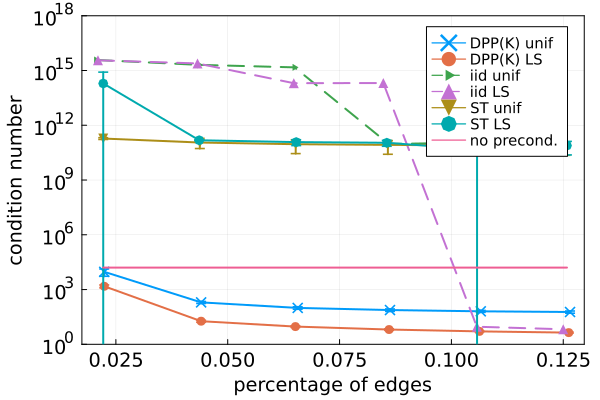

, 0.08828208865070522 + 0.04698361127508592im, 0.09725251740896654 + 0.023305073780241086im, 0.098534859428763 + 0.017089995581248362im, 0.06921371508712568 + 0.07218483807048082im, -0.06647195304929067 + 0.07471720353755135im, 0.09966962096745535 - 0.008210124191933293im, 0.0644969131715036 + 0.07642865771820306im, 0.07147033735370657 + 0.06995123057688572im, 0.09646405490899186 + 0.02637906384790042im, 0.03446626602835751 + 0.09387901006128488im, 0.09213205428684347 - 0.03889560200758887im, 0.06204654551004093 + 0.07843388096208632im, 0.0834148073689717 + 0.05516704742655295im, 0.09999994518583434 + 0.0013066949038234414im, 0.09942036803521333 + 0.01080606602344368im, 0.016085341239182666 + 0.09870622926090386im, 0.08482781867625012 - 0.05296862612716429im], 0.006025888807223795 + 9.565373666753363e-16im)


In [15]:
type = "ERO" 

rng = Random.default_rng()

# connection graph parameters
n = 100
p = 0.9
eta = 1e-3

# regularization parameter
q = 0

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 10 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# planted ranking score
planted_score = randperm(rng,n)

# graph model
if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# print least eigenvalue
B = sp_magnetic_incidence(meta_g)
l = power_method_least_eigenvalue(B' * B)
println("least eigenvalue: ", real.(l))

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng; q_system=1e-13)
name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e18)
plot_comparison_cond(D_results,y_limits;legendposition=:topright)

# saving plot
savefig("figures/"*name*".pdf")


## Combinatorial Laplacian with a real graph


In [ ]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using GraphIO 
using ParserCombinator 

In [ ]:
real_g = "polblogs.gml"
g = loadgraph(real_g, "digraph", GraphIO.GML.GMLFormat())
g = SimpleGraph(g)

rng = Random.default_rng()

In [ ]:
# select largest connected component
temp = connected_components(g)
g = g[temp[1]]

meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

# Laplacian 
B = magnetic_incidence(meta_g)
L = B' * B
l = eigvals(L)
# least eigenvalues to check the graph has one connected component
println(l[1:5]')

In [ ]:
# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 3 # number of runs

# regularization parameter
q = 0.1

# storing settings
D_params = Dict("q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng)
name = "precond_PolBlogs_"*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e4)
plot_comparison_cond(D_results,y_limits;legendposition=:topright)

# saving plot
savefig("figures/"*name*".pdf")

In [ ]:
# average number of roots
method = "DPP(K) unif"
plot_nb_roots(D_results, method; legendposition=:topleft)

# saving
foldername = "figures/"*name*"_nb_roots"*".pdf"
savefig(foldername)